In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [3]:
import os
import numpy as np
base_dir = '/home/vplentz/Documentos/ml/begginer/deep/book/vision/catsndogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), 
                                            batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [11]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5971 - acc: 0.6615 - val_loss: 0.4540 - val_acc: 0.8390
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4370 - acc: 0.8150 - val_loss: 0.3709 - val_acc: 0.8640
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3554 - acc: 0.8480 - val_loss: 0.3291 - val_acc: 0.8710
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3198 - acc: 0.8705 - val_loss: 0.3178 - val_acc: 0.8680
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2892 - acc: 0.8825 - val_loss: 0.2906 - val_acc: 0.8810
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2645 - acc: 0.8930 - val_loss: 0.2796 - val_acc: 0.8830
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2581 - acc: 0.9005 - val_loss: 0.2688 - val_acc: 0.8910
Epoch 8/30
200

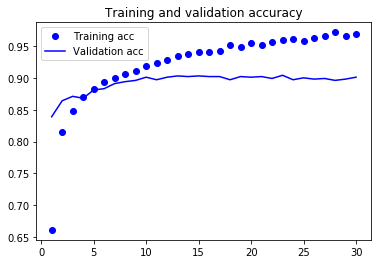

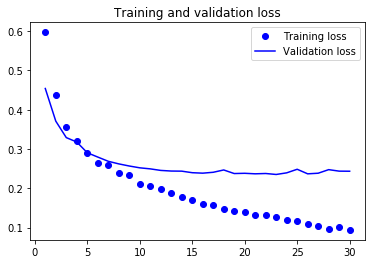

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

with data augmentation

In [3]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
    print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

('This is the number of trainable weights before freezing the conv base:', 30)


In [6]:
conv_base.trainable = False

In [7]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

('This is the number of trainable weights after freezing the conv base:', 4)


In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator( rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory( validation_dir, target_size=(150, 150), 
                                                        batch_size=20, class_mode='binary')
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 86s 859ms/step - loss: 0.6017 - acc: 0.6855 - val_loss: 0.4594 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 68s 683ms/step - loss: 0.4880 - acc: 0.7780 - val_loss: 0.3689 - val_acc: 0.8550
Epoch 3/30
100/100 [==============================] - 69s 694ms/step - loss: 0.4280 - acc: 0.8125 - val_loss: 0.3354 - val_acc: 0.8640
Epoch 4/30
100/100 [==============================] - 68s 684ms/step - loss: 0.4103 - acc: 0.8075 - val_loss: 0.3098 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 68s 684ms/step - loss: 0.3811 - acc: 0.8280 - val_loss: 0.2935 - val_acc: 0.8760
Epoch 6/30
100/100 [==============================] - 69s 686ms/step - loss: 0.3681 - acc: 0.8390 - val_loss: 0.2812 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 69s 686ms/step - loss: 0.3581 - acc: 0.8460 - val_lo

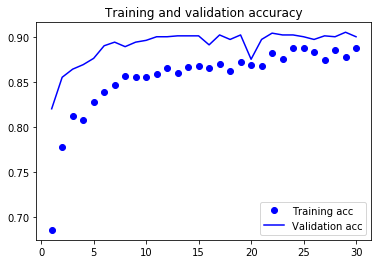

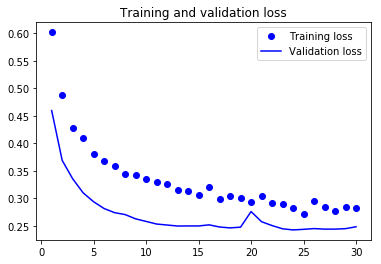

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()